In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

# ***HR Analytics -- Naive Bayes classifier***

<br>

## Categorical Features Description

<br>

|   | Education | EnvironmentSatis | JobInvolvement | Performance | Relationship | WLB |
|----|-----------|------------------|----------------|:-----------:|--------------|-----|
|  1 | Below College|Low|Low|Low|Low|Bad|
|  2 | College|Medium|Medium|Good|Medium|Good|
|   3| Bachelor|High|High|Excellent|High|Better|
|  4 |  Master|Very High|Very High|Outstanding|Very High|Best|
|  5 |Doctor|-|  -              |     -        |      -        | -   |

<br>



In [2]:
path = 'https://raw.githubusercontent.com/ekapolc/pattern_2022/main/HW/HW02/hr-employee-attrition-with-null.csv'
df = pd.read_csv(path, index_col=[0])

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,2.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,4.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,7.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


## Data Cleaning

In [4]:
def Cleaning(df):
    df.loc[df["Attrition"] == 'No', "Attrition"] = 0.0
    df.loc[df["Attrition"] == 'Yes', "Attrition"] = 1.0
    df['Attrition'] = df['Attrition'].astype('float64')
    
    # convert each categorical to numerical
    cats = []
    for col in df.columns:
        if str(df[col].dtype) != 'float64':
            cats.append(str(col))
    for col in cats:
        df[col] = pd.Categorical(df[col]).codes
        
        df.loc[df[col] == -1, col] = np.nan
    # Drop EmployeeNumber & EmployeeCount
    df = df.drop(columns = ['EmployeeNumber', 'EmployeeCount'])
    
    return df

df = Cleaning(df)

## Data segment (Train-Test split)

In [5]:
def gen_test():
    index_yes = df[df['Attrition'] == 1].index
    index_no = df[df["Attrition"] == 0].index
    
    yes_10 = np.random.choice(len(index_yes), size=int(np.ceil(len(index_yes)*0.1)), replace=False)
    no_10 = np.random.choice(len(index_no), size=int(np.ceil(len(index_no)*0.1)), replace=False)
    
    test_index = []
    test_index.extend(np.array(index_yes[yes_10]))
    test_index.extend(np.array(index_no[no_10]))
    test_df = df.iloc[test_index]
    train_df = df.drop(index=test_index)
    return train_df, test_df

In [6]:
train_df, test_df = gen_test() # size = 148

In [7]:
train_df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1052.000000,1322.00000,1067.000000,1061.000000,1060.000000,1055.000000,1053.000000,1059.000000,1062.000000,1056.000000,...,1055.000000,1059.0,1061.000000,1060.000000,1054.000000,1056.000000,1055.000000,1055.000000,1072.000000,1060.000000
mean,37.201521,0.16112,1.619494,798.442978,1.255660,9.422749,2.933523,2.254958,2.734463,0.588068,...,2.687204,80.0,0.750236,11.358491,2.777989,2.765152,7.120379,4.298578,2.215485,4.108491
std,9.142871,0.36778,0.653691,407.945906,0.533766,8.212053,1.033354,1.339089,1.092826,0.492416,...,1.096301,0.0,0.824628,7.862833,1.283266,0.712620,6.273624,3.624834,3.250400,3.577092
min,18.000000,0.00000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.00000,1.000000,461.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.00000,2.000000,793.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.00000,2.000000,1171.000000,2.000000,15.000000,4.000000,3.000000,4.000000,1.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1.00000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [8]:
test_df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,124.000000,148.000000,109.00000,115.000000,116.000000,121.000000,123.000000,117.000000,114.000000,120.000000,...,121.000000,117.0,115.000000,116.000000,122.000000,120.000000,121.000000,121.000000,104.000000,116.000000
mean,36.564516,0.162162,1.53211,802.869565,1.206897,8.958678,2.813008,2.316239,2.728070,0.566667,...,2.760331,80.0,0.773913,10.715517,2.868852,2.816667,6.603306,4.223140,1.576923,3.991379
std,9.602881,0.369851,0.72736,399.451565,0.466574,8.412686,0.986379,1.368674,1.099357,0.497613,...,1.072573,0.0,0.806344,7.020227,1.354215,0.634887,4.662759,3.697944,1.983878,3.163640
min,19.000000,0.000000,0.00000,104.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,1.00000,438.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.00000,829.000000,1.000000,6.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,42.000000,0.000000,2.00000,1140.000000,1.000000,13.000000,3.000000,3.000000,4.000000,1.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1.000000,2.00000,1476.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,80.0,3.000000,32.000000,6.000000,4.000000,22.000000,16.000000,11.000000,12.000000


## Histrogram ***Discretization***

In [9]:
# JUST Plot function
def plot(data, bins, message):
    plt.figure(figsize=(7,3))
    ax = plt.subplot(1, 1, 1)
    ax.hist(data, bins)
    print(message)
    plt.show()

- ### T4 Observe histogram

Age attribute


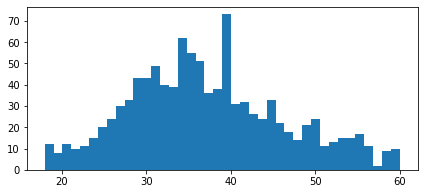

MonthlyIncome attribute


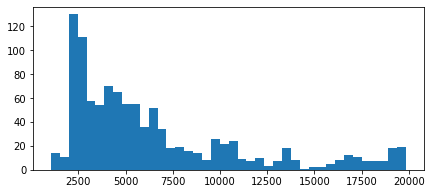

DistanceFromHome attribute


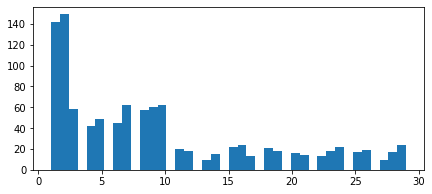

In [10]:
# remove NaN values to plot distribution
hist_list = ['Age', 'MonthlyIncome', 'DistanceFromHome']
# bins parameters
bins = 40

for feat in hist_list:
    x = train_df[~np.isnan(train_df[feat])][feat]
    plot(x, bins, f"{feat} attribute")

Age attribute


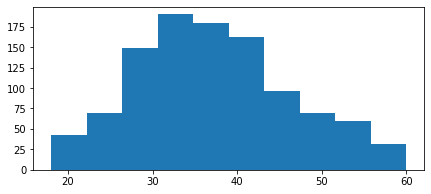

MonthlyIncome attribute


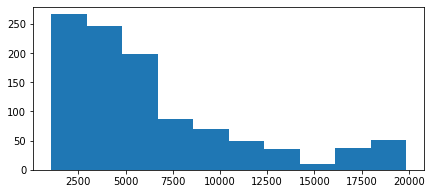

DistanceFromHome attribute


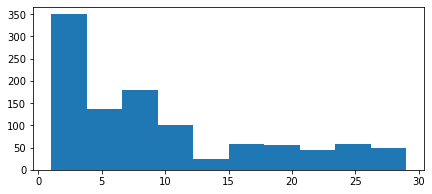

In [11]:
# remove NaN values to plot distribution
hist_list = ['Age', 'MonthlyIncome', 'DistanceFromHome']
# bins parameters
bins = 10

for feat in hist_list:
    x = train_df[~np.isnan(train_df[feat])][feat]
    plot(x, bins, f"{feat} attribute")

In [12]:
def make_digitized(x, bins):
    bin_list = np.arange(min(x), max(x), (max(x)-min(x))/bins)
    bin_list[0] = -np.inf
    bin_list = np.append(bin_list, np.inf)
    digitized = np.digitize(x, bin_list)
    return digitized, bin_list

Bins =  10
[  0  42  70 149 190 180 162  97  70  60  32]
Age attribute


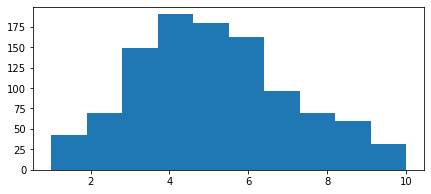

Bins =  40
[ 0 12  8 12 10 11 15 20 24 30 33 43 43 49 40 39 62 55 51 36 71 40 31 32
 26 24 33 22 18 14 21 24 11 13 15 15 17 11  2  9 10]
Age attribute


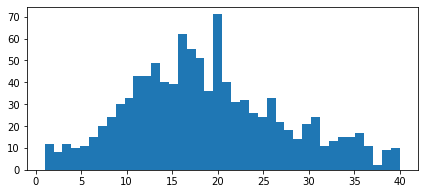

Bins =  100
[ 0  6  0  6  0  8  0  0 12  0 10  0 11  0  0 15  0 20  0  0 24  0 30  0
 33  0  0 43  0 43  0 49  0  0 40  0 39  0  0 62  0 55  0 51  0  0 36  0
 38  0 33  0  0 40  0 31  0  0 32  0 26  0 24  0  0 33  0 22  0  0 18  0
 14  0 21  0  0 24  0 11  0 13  0  0 15  0 15  0  0 17  0 11  0  2  0  0
  9  0  6  0  4]
Age attribute


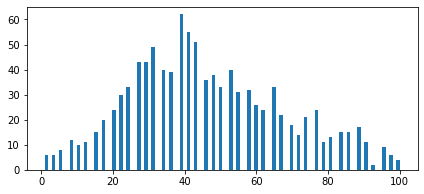

Bins =  10
[  0 266 247 198  87  70  50  36  10  38  51]
MonthlyIncome attribute


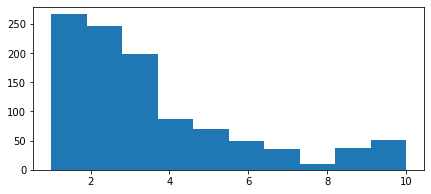

Bins =  40
[  0  14  11 130 111  58  54  70  65  55  55  36  52  34  18  19  16  14
   8  26  22  24   9   7  10   3   7  18   8   1   2   2   5   8  12  11
   7   7   7  18  19]
MonthlyIncome attribute


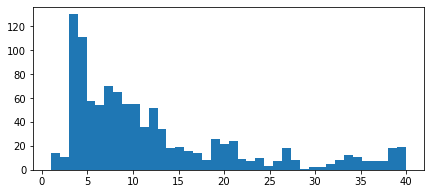

Bins =  100
[ 0  7  5  7  3  3 47 53 47 50 44 30 21 23 21 17 26 26 29 26 28 24 18 29
 26 13 15 14 15 24 20 23  7  4  8 10  6 11  5  7  6  7  5  3  4  3 10 10
  9  7 12  9 10  9  3  2  3  3  6  3  2  2  0  1  1  6  5  9  7  4  1  0
  1  1  1  0  0  2  0  1  4  2  5  4  5  4  6  3  3  4  2  2  4  1  4  3
  7  9  7  8  6]
MonthlyIncome attribute


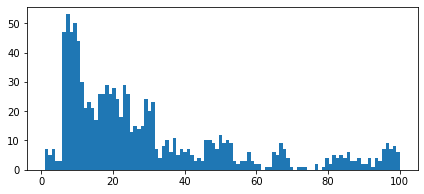

Bins =  10
[  0 349 136 179 100  24  59  55  45  58  50]
DistanceFromHome attribute


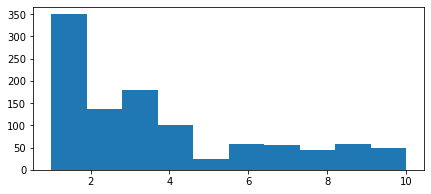

Bins =  40
[  0 142 149  58   0  42  49   0  45  62   0  57  60  62   0  20  18   0
   9  15   0  22  24  13   0  21  18   0  16  14   0  13  18  22   0  17
  19   0   9  17  24]
DistanceFromHome attribute


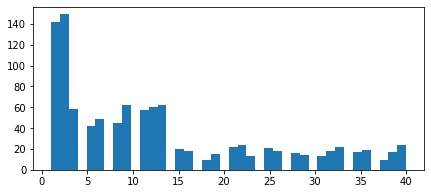

Bins =  100
[  0 142   0   0 149   0   0   0  58   0   0  42   0   0   0  49   0   0
  45   0   0   0  62   0   0   0  57   0   0  60   0   0   0  62   0   0
  20   0   0   0  18   0   0   9   0   0   0  15   0   0  22   0   0   0
  24   0   0   0  13   0   0  21   0   0   0  18   0   0  16   0   0   0
  14   0   0  13   0   0   0  18   0   0   0  22   0   0  17   0   0   0
  19   0   0   9   0   0   0  17   0   0  24]
DistanceFromHome attribute


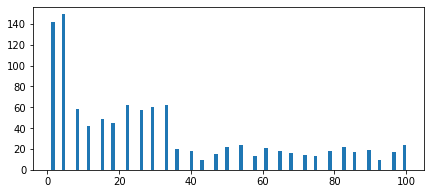

In [13]:
hist_list = ['Age', 'MonthlyIncome', 'DistanceFromHome']
# bins parameters
bins_list = [10, 40, 100]
for feat in hist_list:
    for b in bins_list:
        print("Bins = ", b)
        x = train_df[~np.isnan(train_df[feat])][feat]
        dg, bin_edge = make_digitized(x, b)
        print(np.bincount(dg))
        plot(dg, b, f"{feat} attribute")

## Select Features for Discretize

In [14]:
# We should decretize feature that has continuous values, in other word -> many unique values
decretize_list = []
non_decretize = []
for feat in df.columns:
    if feat == "Attrition" or (train_df[feat].nunique()==1):
        continue;
    if df[feat].nunique() > 10:
        decretize_list.append(feat)
        print(feat, " : unique --> ", df[feat].nunique())
    else:
        non_decretize.append(feat)

Age  : unique -->  43
DailyRate  : unique -->  773
DistanceFromHome  : unique -->  29
HourlyRate  : unique -->  71
MonthlyIncome  : unique -->  1105
MonthlyRate  : unique -->  1143
PercentSalaryHike  : unique -->  15
TotalWorkingYears  : unique -->  39
YearsAtCompany  : unique -->  35
YearsInCurrentRole  : unique -->  19
YearsSinceLastPromotion  : unique -->  16
YearsWithCurrManager  : unique -->  18


Age attribute


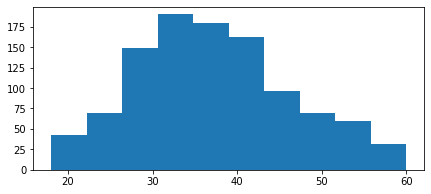

DailyRate attribute


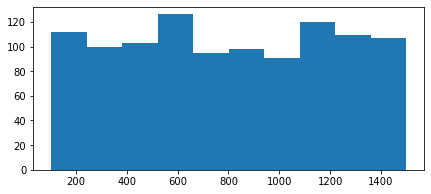

DistanceFromHome attribute


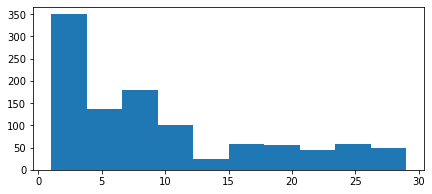

HourlyRate attribute


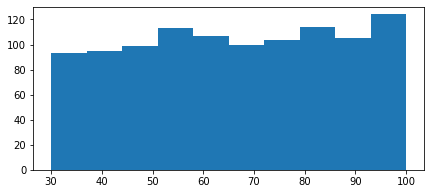

MonthlyIncome attribute


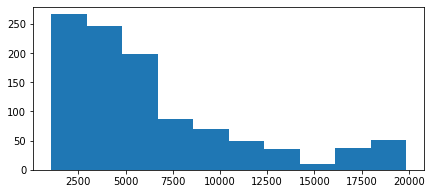

MonthlyRate attribute


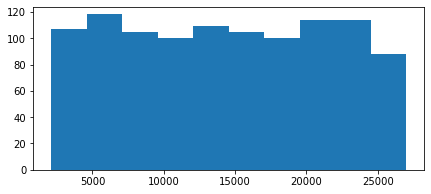

PercentSalaryHike attribute


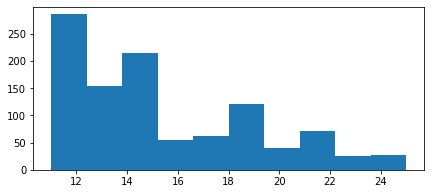

TotalWorkingYears attribute


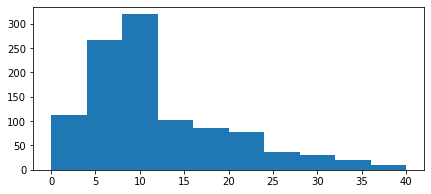

YearsAtCompany attribute


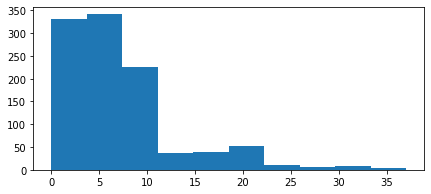

YearsInCurrentRole attribute


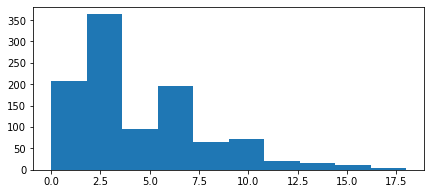

YearsSinceLastPromotion attribute


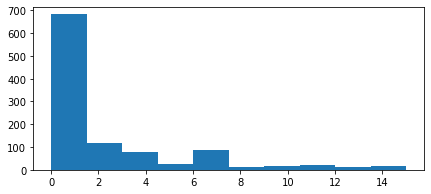

YearsWithCurrManager attribute


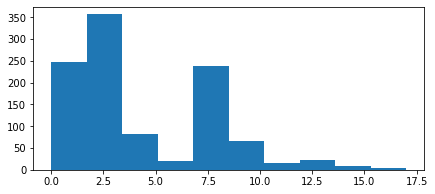

In [15]:
# Just plot
# bins parameters
bins = 10

for feat in decretize_list:
    x = train_df[~np.isnan(train_df[feat])][feat]
    plot(x, bins, f"{feat} attribute")

# The MLE for the likelihood distribution

In [16]:
def plot_dist(df, feat, bins=10):
    leave_df = df[df["Attrition"] == 1]
    stay_df = df[df["Attrition"] == 0]
    x_all = df[~np.isnan(df[feat])][feat]
    x_leave = leave_df[~np.isnan(leave_df[feat])][feat]
    x_stay = stay_df[~np.isnan(stay_df[feat])][feat]

    fig, ax = plt.subplots(1,3, figsize=(15,4))
    
    hist, bins = np.histogram(x_all, bins = bins)
    ax[0].bar(bins[:-1], hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0]), color='grey')
    hist1, bins1 = np.histogram(x_leave)
    ax[1].bar(bins1[:-1], hist1.astype(np.float32) / hist1.sum(), width=(bins1[1]-bins1[0]), color='grey')
    hist2, bins2 = np.histogram(x_stay)
    ax[2].bar(bins2[:-1], hist2.astype(np.float32) / hist2.sum(), width=(bins2[1]-bins2[0]), color='grey')

    ax[0].set_title('All Attrition')
    ax[1].set_title('Leave Attrition')
    ax[2].set_title('Stay Attrition')
    plt.show()

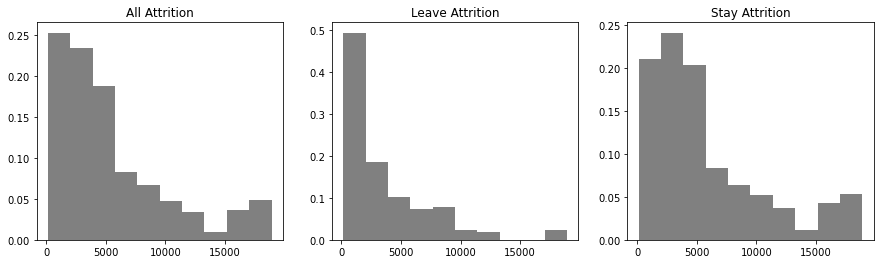

In [17]:
plot_dist(train_df, "MonthlyIncome", bins=10)

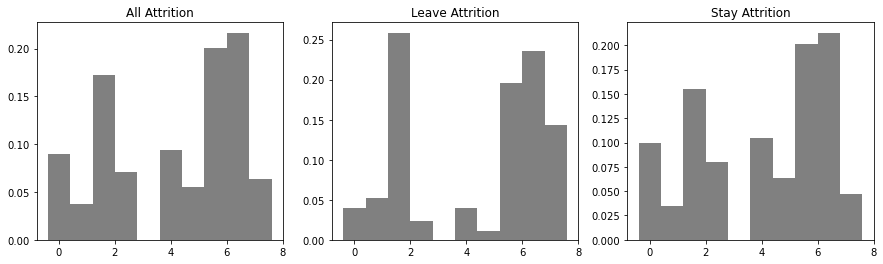

In [18]:
plot_dist(train_df, "JobRole", bins=10)

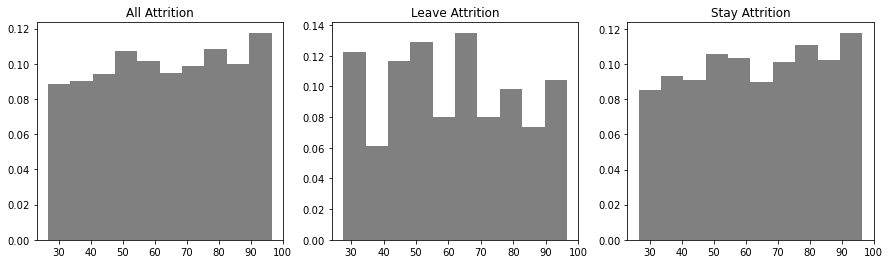

In [19]:
plot_dist(train_df, "HourlyRate", bins=10)

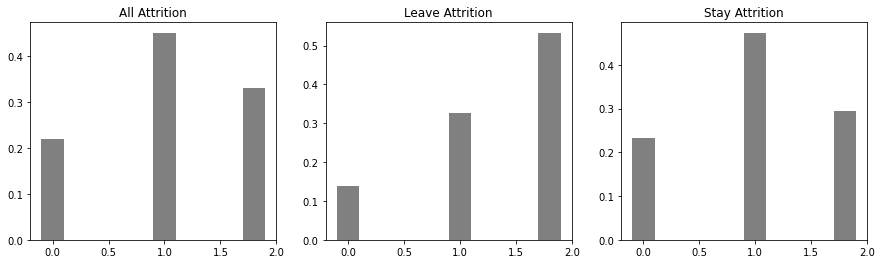

In [20]:
plot_dist(train_df, "MaritalStatus", bins=10)

# Naive Bayes Classification 
<br>

- #### Using Histogram distribution


In [21]:
# We should decretize feature that has continuous values, in other word -> many unique values
decretize_list = []
non_decretize = []
for feat in df.columns:
    if feat == "Attrition" or (train_df[feat].nunique()==1):
        continue;
    if df[feat].nunique() > 10:
        decretize_list.append(feat)
        print(feat, " : unique --> ", df[feat].nunique())
    else:
        non_decretize.append(feat)

Age  : unique -->  43
DailyRate  : unique -->  773
DistanceFromHome  : unique -->  29
HourlyRate  : unique -->  71
MonthlyIncome  : unique -->  1105
MonthlyRate  : unique -->  1143
PercentSalaryHike  : unique -->  15
TotalWorkingYears  : unique -->  39
YearsAtCompany  : unique -->  35
YearsInCurrentRole  : unique -->  19
YearsSinceLastPromotion  : unique -->  16
YearsWithCurrManager  : unique -->  18


In [22]:
print(decretize_list) 

['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [23]:
print(non_decretize)

['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']


In [24]:
def get_binslist(df, feat, bins=10):
    x = df[~np.isnan(df[feat])][feat]
    bin_list = np.arange(min(x), max(x), (max(x)-min(x))/bins)
    bin_list[0] = -np.inf
    bin_list = np.append(bin_list, np.inf)
    digitized = np.digitize(x, bin_list)
    return bin_list, np.bincount(digitized)/len(x)

def get_problist(df, feat, bins_list):
    x = df[~np.isnan(df[feat])][feat]
    digitized = np.digitize(x, bins_list)
    prob_list = np.bincount(digitized)/len(x)
    return np.append(prob_list, np.zeros(len(bins_list)))

def get_digitized(x, bins_list):
    digitized = np.digitize(x, bins_list)
    return digitized

def get_prob(digitized, prob_list):
    return prob_list[digitized]

In [25]:
train_leave_df = train_df[train_df["Attrition"] == 1]
train_stay_df = train_df[train_df["Attrition"] == 0]

In [26]:
# Evaluation Metric
def confusion_metric(y_true, y_pred):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(y_true)):
        if((y_true[i]==1) and (y_true[i]==y_pred[i])):
            tp += 1
        elif((y_true[i]==0) and (y_true[i]!=y_pred[i])):
            fp += 1
        elif((y_true[i]==1) and (y_true[i]!=y_pred[i])):
            fn += 1
        else:
            tn += 1
    return tp, fp, fn, tn

def get_metric(y_true, y_pred):
    assert len(y_true) == len(y_pred), "Both label must be the same length."
    tp, fp, fn, tn = confusion_metric(y_true, y_pred)
    accuracy = (tp+tn)/(len(y_true))
    precision = tp/(tp+fp+1e-9)
    recall = tp/(tp+fn+1e-9)
    f1 = 2*((recall*precision)/(recall+precision+1e-9))
    return accuracy, precision, recall, f1

In [27]:
def Naive_bayes(threshold=0, set_bins = 10):
    prediction = np.zeros((len(test_df)))
    for lists in [decretize_list, non_decretize]:
        for feat in lists:
            if feat in non_decretize:
                bins = train_df[feat].nunique()
            else:
                bins = set_bins;
            bin_list_all, prob_list_all = get_binslist(train_df, feat, bins)
        # Leave side (Attrition==1) calculation
            prob_list = get_problist(train_leave_df, feat, bin_list_all)
            prob_list[0] = 1 # when log is applied, NaN term become zero that means not take into account.
            dg = get_digitized(test_df[feat], bin_list_all)
            dg[dg>(len(bin_list_all)-1)]=0 # NaN become index 0 of prob
            #dg = dg.reshape([len(dg), 1])
            p = get_prob(dg, prob_list)
            z = np.argwhere(p == 0)
            p[z] += 1e-9
            log_p_leave = np.log(p)

        # Stay side (Attrition==0) calculation
            prob_list = get_problist(train_stay_df, feat, bin_list_all)
            prob_list[0] = 1 # when log is applied, NaN term become zero that means not take into account.
            dg = get_digitized(test_df[feat], bin_list_all)
            dg[dg>(len(bin_list_all)-1)]=0 # NaN become index 0 of prob
            #dg = dg.reshape([len(dg), 1])
            p = get_prob(dg, prob_list)
            z = np.argwhere(p == 0)
            p[z] += 1e-9
            log_p_stay = np.log(p)
            feature_likelihood = log_p_leave-log_p_stay
        # Sum over features
            prediction += feature_likelihood

    # Prior calculation
    prior = np.array(train_df["Attrition"].value_counts()/len(train_df))
    log_prior_leave = np.log(prior[1]) # prior = 0.161
    log_prior_stay = np.log(prior[0])# prior = 0.839
    log_prior = log_prior_leave-log_prior_stay
    prediction += log_prior

    prediction[prediction >= threshold] = 1
    prediction[prediction < threshold] = 0
    
    return prediction

In [28]:
prediction = Naive_bayes(0)
prediction

array([0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [29]:
label = np.array(test_df["Attrition"])
label

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
acc, prec, rec, f1 = get_metric(label, prediction)
print("Accuracy : ", acc)
print("Precision : ", prec)
print("Recall : ", rec)
print("F1 Score : ", f1)

Accuracy :  0.8648648648648649
Precision :  0.5714285714081633
Recall :  0.6666666666388888
F1 Score :  0.6153846148639052


# Using PDF Gaussian

In [31]:
def get_mean(df, feat):
    data = df[~np.isnan(df[feat])][feat]
    return sum(data)/len(data)

def get_stdev(df, feat):
    data = df[~np.isnan(df[feat])][feat]
    avg = get_mean(df, feat)
    variance = sum([(x-avg)**2 for x in data]) / float(len(data)-1)
    return np.sqrt(variance)

In [32]:
data_dict_leave = {}
data_dict_stay = {}

for lists in [decretize_list, non_decretize]:
    for feat in lists:
        mu = get_mean(train_leave_df, feat)
        std = get_stdev(train_leave_df, feat)
        data_dict_leave[feat] = [mu, std]
        
        mu2 = get_mean(train_stay_df, feat)
        std2 = get_stdev(train_stay_df, feat)
        data_dict_stay[feat] = [mu2, std2]

In [33]:
from scipy.stats import norm

prediction = np.zeros((len(test_df)))
for lists in [decretize_list, non_decretize]:
    for feat in lists:
    # Leave side (Attrition==1) calculation
        p = norm(data_dict_leave[feat][0], data_dict_leave[feat][1]).pdf(test_df[feat])
        p = np.nan_to_num(p, nan=1)
        p += 1e-6
        log_p_leave = np.log(p)

    # Stay side (Attrition==0) calculation
        p = norm(data_dict_stay[feat][0], data_dict_stay[feat][1]).pdf(test_df[feat])
        p = np.nan_to_num(p, nan=1)
        p += 1e-6
        log_p_stay = np.log(p)
        feature_likelihood = log_p_leave-log_p_stay
    # Sum over features
        prediction += feature_likelihood
            
# Prior calculation
prior = np.array(train_df["Attrition"].value_counts()/len(train_df))
log_prior_leave = np.log(prior[1]) # prior = 0.161
log_prior_stay = np.log(prior[0])# prior = 0.839
log_prior = log_prior_leave-log_prior_stay
prediction += log_prior

prediction[prediction >= 0] = 1
prediction[prediction < 0] = 0

In [34]:
prediction

array([0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [35]:
label = np.array(test_df["Attrition"])
label

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [36]:
acc, prec, rec, f1 = get_metric(label, prediction)
print("Accuracy : ", acc)
print("Precision : ", prec)
print("Recall : ", rec)
print("F1 Score : ", f1)

Accuracy :  0.8513513513513513
Precision :  0.545454545429752
Recall :  0.49999999997916666
F1 Score :  0.5217391299130434


# Baseline Evaluation
- ##### Random choice
- ##### Majority Rule

In [37]:
# Random choice
rng_pred = np.random.choice(a=[0,1], size=len(test_df), p=[0.5,0.5])
rng_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [38]:
label

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
acc, prec, rec, f1 = get_metric(label, rng_pred)
print("Accuracy : ", acc)
print("Precision : ", prec)
print("Recall : ", rec)
print("F1 Score : ", f1)

Accuracy :  0.5202702702702703
Precision :  0.16901408450466177
Recall :  0.49999999997916666
F1 Score :  0.25263157856443214


In [40]:
# Majority Rule
major_pred = np.zeros(len(test_df))
major_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
acc, prec, rec, f1 = get_metric(label, major_pred)
print("Accuracy : ", acc)
print("Precision : ", prec)
print("Recall : ", rec)
print("F1 Score : ", f1)

Accuracy :  0.8378378378378378
Precision :  0.0
Recall :  0.0
F1 Score :  0.0


# Threshold Finding

In [42]:
# create list of threshold
t_list = np.arange(-5, 5, 0.05)
print(len(t_list))

200


In [43]:
from tqdm import tqdm

best_acc = 0
best_F1 = 0
best_t_acc = 0
best_t_f1 = 0
for t in tqdm(t_list):
    pred = Naive_bayes(threshold=t)
    acc, precision, recall, f1 = get_metric(y_true=label, y_pred=pred)
    if acc > best_acc:
        best_acc = acc
        best_t_acc = t
    if f1 > best_F1:
        best_F1 = f1
        best_t_f1 = t

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:14<00:00, 13.41it/s]


In [44]:
print("Best Threshold(Best accuracy): ", best_t_acc, " Acc = ", best_acc)
print("Best Threshold(Best F1): ", best_t_f1, " Acc = ", best_F1)

Best Threshold(Best accuracy):  0.49999999999998046  Acc =  0.8716216216216216
Best Threshold(Best F1):  -1.7763568394002505e-14  Acc =  0.6153846148639052


# Plot RoC

In [45]:
def plot_roc(lower, upper, step, discretize_bins=[10]):
    t_list = np.arange(lower, upper, step)
    plt.figure(figsize=(10,10))
    for bins in discretize_bins:
        tpr_list = []
        fpr_list = []
        for t in tqdm(t_list):
            pred = Naive_bayes(threshold=t, set_bins=bins)
            tp, fp, fn, tn = confusion_metric(y_true=label, y_pred=pred)
            tpr = tp/(tp+fn+1e-9)
            fpr = fp/(fp+tn+1e-9)
            tpr_list.append(tpr)
            fpr_list.append(fpr)

        plt.plot(fpr_list, tpr_list, lw=1, label=f"ROC bins: {bins}")
    
    plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

100%|████████████████████████████████████████████████████████████████████████████████| 460/460 [00:34<00:00, 13.19it/s]


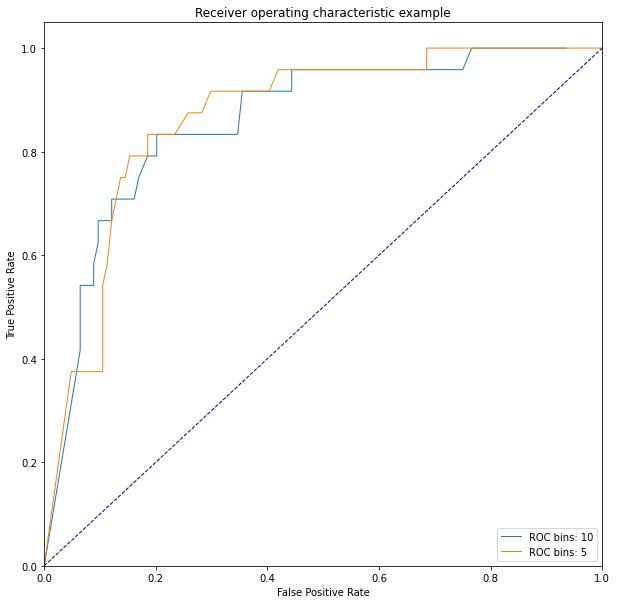

In [46]:
plot_roc(-18, 5, 0.05, discretize_bins=[10,5])

# Shuffle Folds

In [47]:
def gen_test():
    index_yes = df[df['Attrition'] == 1].index
    index_no = df[df["Attrition"] == 0].index
    
    yes_10 = np.random.choice(len(index_yes), size=int(np.ceil(len(index_yes)*0.1)), replace=False)
    no_10 = np.random.choice(len(index_no), size=int(np.ceil(len(index_no)*0.1)), replace=False)
    
    test_index = []
    test_index.extend(np.array(index_yes[yes_10]))
    test_index.extend(np.array(index_no[no_10]))
    test_df = df.iloc[test_index]
    train_df = df.drop(index=test_index)
    return train_df, test_df

In [48]:
def process(train_df, test_df):
    decretize_list = []
    non_decretize = []
    for feat in df.columns:
        if feat == "Attrition" or (train_df[feat].nunique()==1):
            continue;
        if df[feat].nunique() > 10:
            decretize_list.append(feat)
        else:
            non_decretize.append(feat)
    return decretize_list, non_decretize

In [49]:
def get_classified_df(train_df, test_df):    
    train_leave_df = train_df[train_df["Attrition"] == 1]
    train_stay_df = train_df[train_df["Attrition"] == 0]
    label = np.array(test_df["Attrition"])
    return train_leave_df, train_stay_df, label

In [50]:
# Shuffle for 10 times
n = 10
all_acc = []
all_f1 = []
for i in range(n):
    train_df, test_df = gen_test()
    decretize_list, non_decretize = process(train_df, test_df)
    train_leave_df, train_stay_df, label = get_classified_df(train_df, test_df)
    pred = Naive_bayes(threshold=-0.8, set_bins=10)
    acc, precision, recall, f1 = get_metric(label, pred)
    print("Setting ", i+1, f"   : Accuracy = {acc:.3f} , F1 = {f1:.3f}")
    all_acc.append(acc)
    all_f1.append(f1)

print("\n")
print(f"Mean accuracy for 10 shuffles is {np.mean(all_acc):.4f}")
print(f"Variance accuracy for 10 shuffles is {np.std(all_acc):.4f}\n")
print(f"Mean F1 score for 10 shuffles is {np.mean(all_f1):.4f}")
print(f"Variance F1 for 10 shuffles is {np.std(all_acc):.4f}")

Setting  1    : Accuracy = 0.757 , F1 = 0.400
Setting  2    : Accuracy = 0.777 , F1 = 0.400
Setting  3    : Accuracy = 0.770 , F1 = 0.469
Setting  4    : Accuracy = 0.750 , F1 = 0.413
Setting  5    : Accuracy = 0.703 , F1 = 0.290
Setting  6    : Accuracy = 0.804 , F1 = 0.473
Setting  7    : Accuracy = 0.797 , F1 = 0.483
Setting  8    : Accuracy = 0.764 , F1 = 0.444
Setting  9    : Accuracy = 0.818 , F1 = 0.491
Setting  10    : Accuracy = 0.845 , F1 = 0.582


Mean accuracy for 10 shuffles is 0.7784
Variance accuracy for 10 shuffles is 0.0377

Mean F1 score for 10 shuffles is 0.4444
Variance F1 for 10 shuffles is 0.0377
